#시계열 데이터 예측

#시도표 그리기


In [2]:
import pandas as pd
import numpy as np
import datetime
import plotly.graph_objs as go
import plotly.offline as py
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "notebook_connected"

In [3]:
#fbprophet 시계열 예측을 위한 라이브러리
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot

In [4]:
df = pd.read_csv('corona.csv', encoding='CP949')

In [5]:
df.columns=['date','confirmed']
df

,date,confirmed
0,2020. 1. 27.,1
1,2020. 1. 28.,0
2,2020. 2. 4.,1
3,2020. 2. 5.,2
4,2020. 2. 7.,0
...,...,...
243,2020. 8. 31.,248
244,2020. 9. 1.,235
245,2020. 9. 2.,267
246,2020. 9. 3.,195


<Figure size 14400x14400 with 0 Axes>

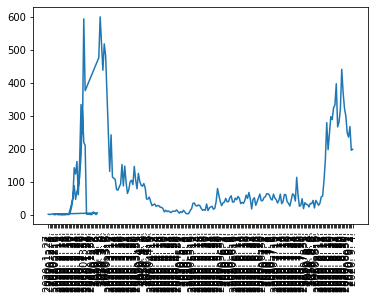

<Figure size 14400x14400 with 0 Axes>

In [6]:
# 데이터 전체(1/27-9/4)
import seaborn as sns
import matplotlib.pyplot as plt

plt.plot('date','confirmed', data=df)
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

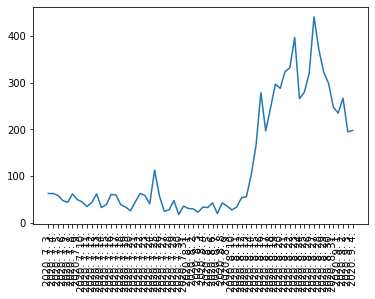

<Figure size 14400x14400 with 0 Axes>

In [18]:
# (7/1-9/4)
plt.plot(df.iloc[184:,0],df.iloc[184:,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

<Figure size 14400x14400 with 0 Axes>

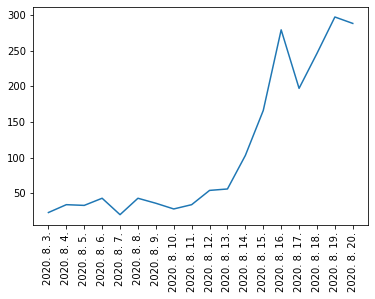

<Figure size 14400x14400 with 0 Axes>

In [19]:
# (8/3-8/20)
plt.plot(df.iloc[215:233,0],df.iloc[215:233,1])
plt.xticks(rotation=90)
plt.figure(figsize=(200,200))

#Facebook Prophet 적용


In [23]:
# Facebook Prophet 예측 모델에 넣을 데이터프레임을 만들어준다.
#(날짜는 ds, 다른 변수는 y로 반드시 맞춰준다)
confirmed_prophet = df.rename(columns={'date': 'ds','confirmed': 'y'})
confirmed_prophet.head()

,ds,y
0,2020. 1. 27.,1
1,2020. 1. 28.,0
2,2020. 2. 4.,1
3,2020. 2. 5.,2
4,2020. 2. 7.,0


In [24]:
#Prophet 객체 생성하고 fit 해준다. 
m=Prophet() 
m.fit(confirmed_prophet)

INFO:numexpr.utils:NumExpr defaulting to 2 threads.
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [25]:
#예측할 미래 dataframe 생성해준다. 30일간의 미래 예측해보기
future=m.make_future_dataframe(periods=30)
future
future.tail()
#9월 4일 기준이므로 10월 4일까지의 예측이 가능하다.

,ds
273,2020-09-30
274,2020-10-01
275,2020-10-02
276,2020-10-03
277,2020-10-04


In [26]:
forecast=m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
273,2020-09-30,196.640781,72.618440,343.041597,193.294049,199.989050,0.791997,0.791997,0.791997,0.791997,0.791997,0.791997,0.0,0.0,0.0,197.432778
274,2020-10-01,197.965905,61.162198,336.466725,194.311169,201.515749,1.701294,1.701294,1.701294,1.701294,1.701294,1.701294,0.0,0.0,0.0,199.667199
275,2020-10-02,199.291030,58.922808,338.148133,195.402463,203.064020,3.325491,3.325491,3.325491,3.325491,3.325491,3.325491,0.0,0.0,0.0,202.616520
276,2020-10-03,200.616154,81.117540,353.256173,196.527433,204.699849,18.164220,18.164220,18.164220,18.164220,18.164220,18.164220,0.0,0.0,0.0,218.780374
277,2020-10-04,201.941278,84.456368,336.645882,197.546762,206.266810,2.564833,2.564833,2.564833,2.564833,2.564833,2.564833,0.0,0.0,0.0,204.506111


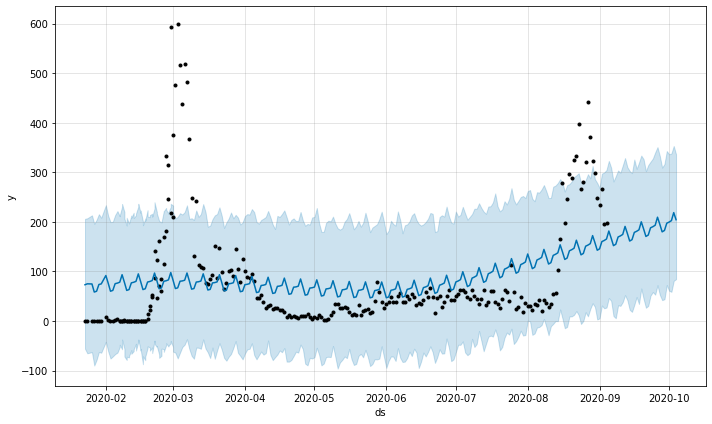

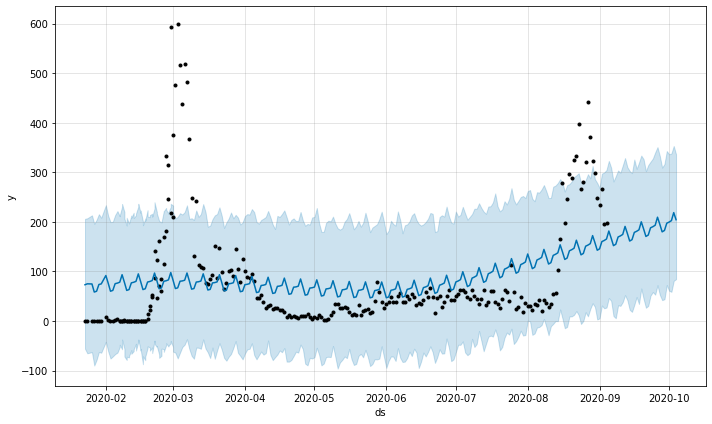

In [27]:
m.plot(forecast)

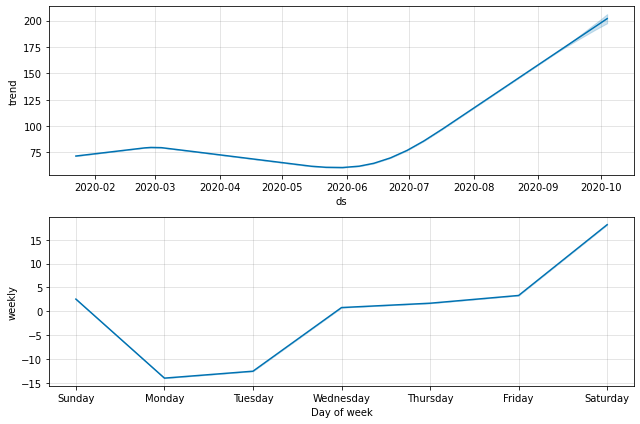

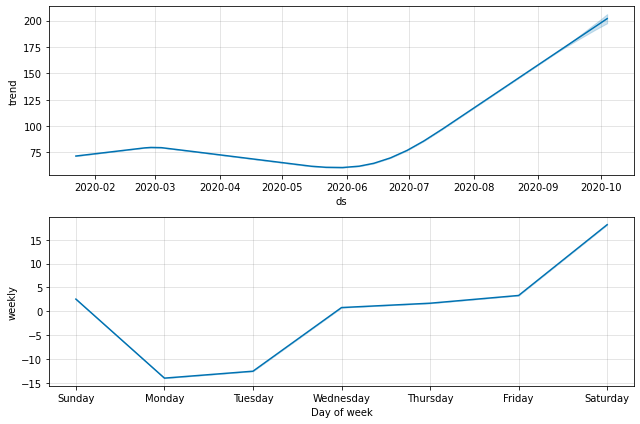

In [28]:
#forecast component를 시각화해준다(Trend, Weakly, Yearly)
m.plot_components(forecast)
#trend는 경향성을 보여주고 weekly는 한 주의 일별 경향을 보여준다.